In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [4]:
data = pd.read_csv('term.csv')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [5]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [6]:
print (data.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object


In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

In [8]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


Encoding Categorial Data 

In [9]:
data['y'] = data['y'].map(lambda x: 0 if x == 'no' else 1)
data['default'] = data['default'].map(lambda x: 0 if x == 'no' else 1)
data['housing'] = data['housing'].map(lambda x: 0 if x == 'no' else 1)
data['loan'] = data['loan'].map(lambda x: 0 if x == 'no' else 1)

In [10]:
data.describe()

,age,default,balance,housing,loan,day,duration,campaign,y
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,0.020225,1274.277550,0.600775,0.173250,16.017225,254.824300,2.882175,0.072400
std,9.641776,0.140771,2903.769716,0.489745,0.378468,8.278127,259.366498,3.239051,0.259152
min,19.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,0.000000,54.000000,0.000000,0.000000,8.000000,100.000000,1.000000,0.000000
50%,39.000000,0.000000,407.000000,1.000000,0.000000,17.000000,175.000000,2.000000,0.000000
75%,48.000000,0.000000,1319.000000,1.000000,0.000000,21.000000,313.000000,3.000000,0.000000
max,95.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,1.000000


In [11]:
print(data.head())
print(data.info())
print(data['y'].value_counts())

   age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  y  
0  unknown    5   may       261         1  0  
1  unknown    5   may       151         1  0  
2  unknown    5   may        76         1  0  
3  unknown    5   may        92         1  0  
4  unknown    5   may       198         1  0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-nul

In [12]:
categorical_columns_subset = [ "job", "marital", "education", "contact",  "month" ]
numerical_columns_subset = [ "age", "default", "balance",  "housing", "loan", "day", "duration", "campaign","y" ]

In [13]:
X = data[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

categorical_columns = X.select_dtypes(include="category").columns
n_categorical_features = len(categorical_columns)
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 40000
Number of features: 14
Number of categorical features: 5
Number of numerical features: 9


In [14]:
X.head()

,job,marital,education,contact,month,age,default,balance,housing,loan,day,duration,campaign,y
0,management,married,tertiary,unknown,may,58,0,2143,1,0,5,261,1,0
1,technician,single,secondary,unknown,may,44,0,29,1,0,5,151,1,0
2,entrepreneur,married,secondary,unknown,may,33,0,2,1,1,5,76,1,0
3,blue-collar,married,unknown,unknown,may,47,0,1506,1,0,5,92,1,0
4,unknown,single,unknown,unknown,may,33,0,1,0,0,5,198,1,0


In [15]:
X.shape, X.dtypes

((40000, 14),
 job          category
 marital      category
 education    category
 contact      category
 month        category
 age             int64
 default         int64
 balance         int64
 housing         int64
 loan            int64
 day             int64
 duration        int64
 campaign        int64
 y               int64
 dtype: object)

In [16]:
features = X.drop(columns=['y'])
y = data.iloc[:, -1]

In [17]:
print(features.head(), y.head(), features.shape, y.shape)

            job  marital  education  contact month  age  default  balance  \
0    management  married   tertiary  unknown   may   58        0     2143   
1    technician   single  secondary  unknown   may   44        0       29   
2  entrepreneur  married  secondary  unknown   may   33        0        2   
3   blue-collar  married    unknown  unknown   may   47        0     1506   
4       unknown   single    unknown  unknown   may   33        0        1   

   housing  loan  day  duration  campaign  
0        1     0    5       261         1  
1        1     0    5       151         1  
2        1     1    5        76         1  
3        1     0    5        92         1  
4        0     0    5       198         1   0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64 (40000, 13) (40000,)


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'default'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'housing'}>],
       [<Axes: title={'center': 'loan'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>]], dtype=object)

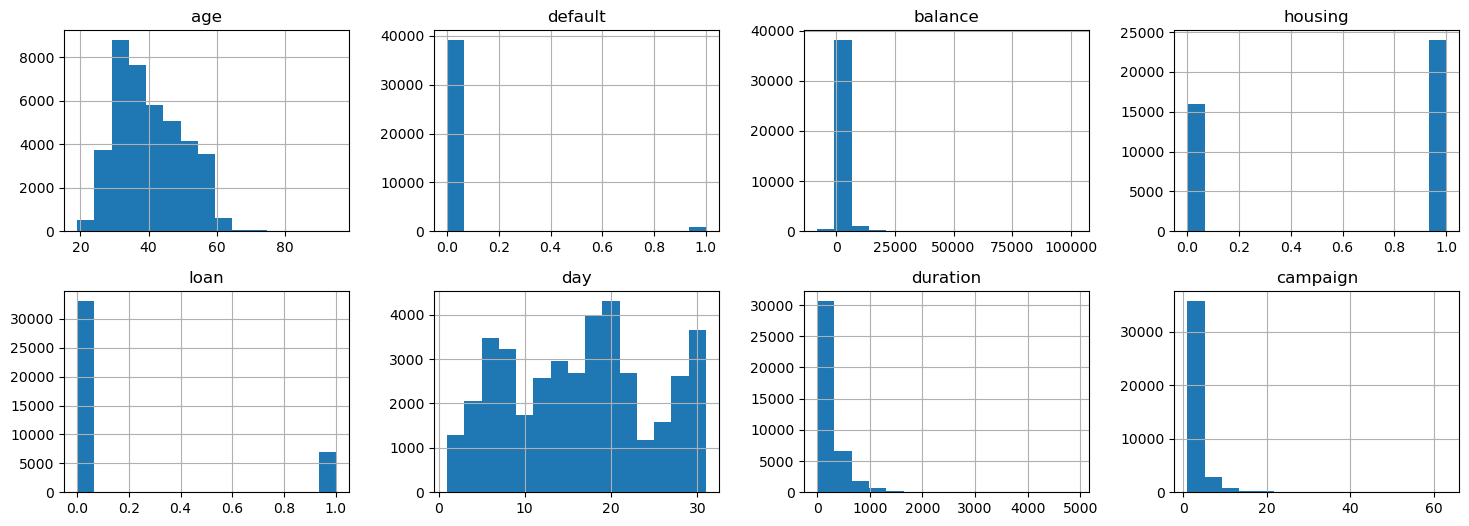

In [18]:
features.hist(bins=15, figsize=(18, 6), layout=(2, 4))

/var/folders/w6/h71jw7yd5hj7f7_1r5971f440000gn/T/ipykernel_29880/921400852.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


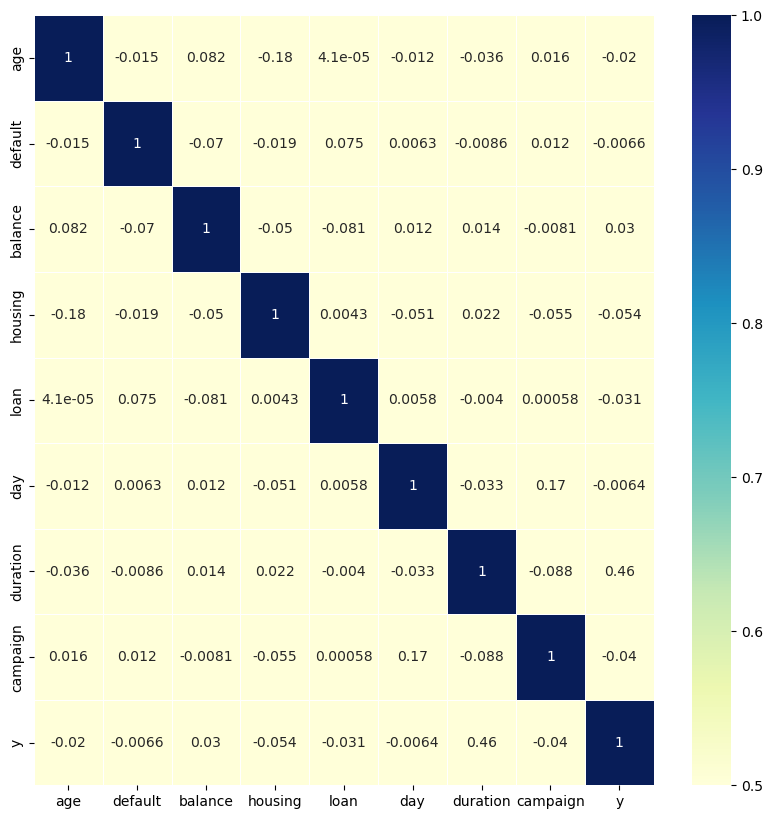

In [19]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=0.5, cmap="YlGnBu")

Variables exposure (Summary of different attributes)

In [20]:
# Categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'y']

# Summarize categorical variables
categorical_summary = {}
for column in categorical_columns:
    categorical_summary[column] = data[column].value_counts()

# Summarize numeric columns
numeric_summary = data.describe()

# Display categorical variable summaries
print("Categorical Variable Summary:")
for column, summary in categorical_summary.items():
    print(f"\nColumn: {column}\n")
    print(summary)

# Display numeric variable summaries
print("\nNumeric Variable Summary:")
print(numeric_summary)


Categorical Variable Summary:

Column: job

blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: job, dtype: int64

Column: marital

married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Column: education

secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: education, dtype: int64

Column: default

0    39191
1      809
Name: default, dtype: int64

Column: housing

1    24031
0    15969
Name: housing, dtype: int64

Column: loan

0    33070
1     6930
Name: loan, dtype: int64

Column: contact

cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

Column: month

may    13532
jul     6380
aug     5215
jun     4734
nov     3598
apr     2718
feb     2296
jan     1176
mar      258
oct     

0    37104
1     2896
Name: y, dtype: int64


<Axes: ylabel='y'>

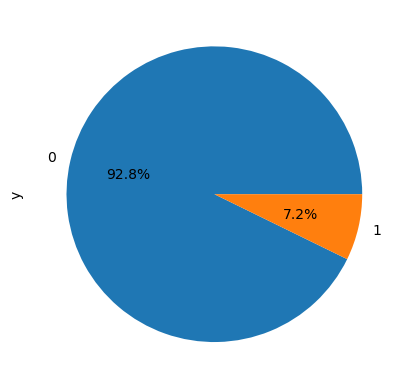

In [21]:
print(y.value_counts())

y.value_counts().plot(kind='pie', autopct='%1.1f%%')

Data exhibits a significant imbalance, with a predominant 'No' response, 
indicating that only a very small percentage of customers have subscribed to a term deposit.

Normal Charts for the attributes.

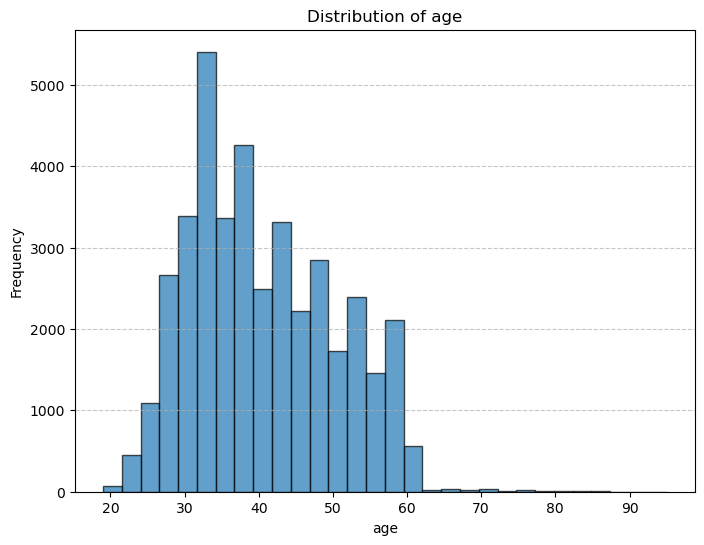

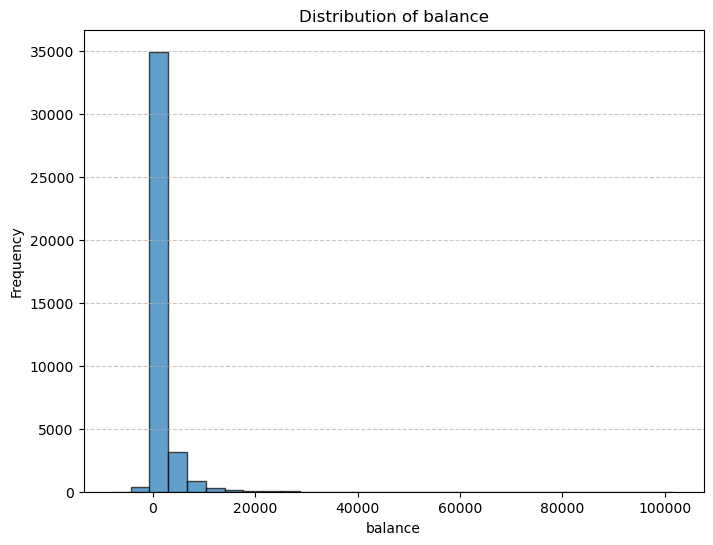

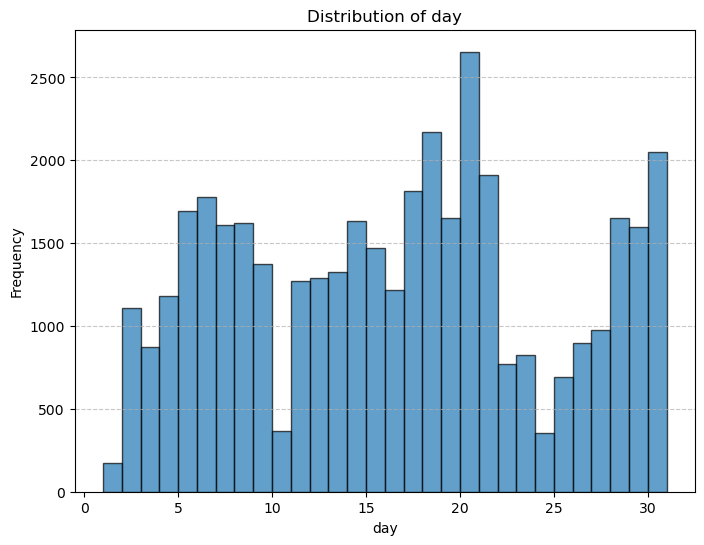

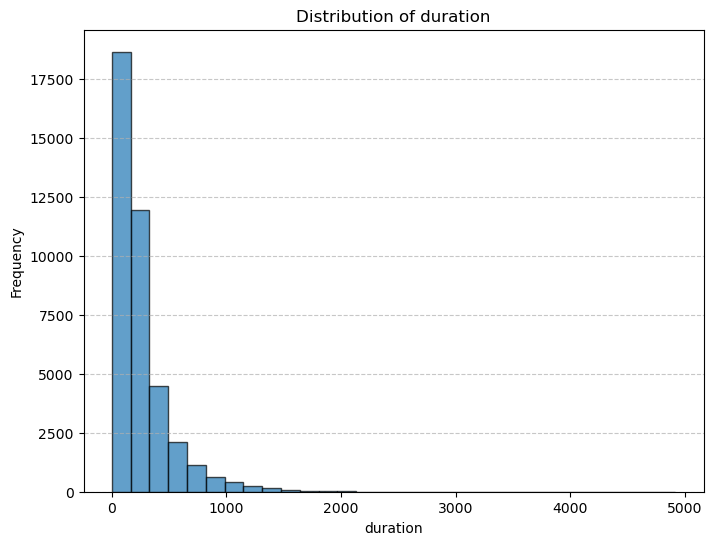

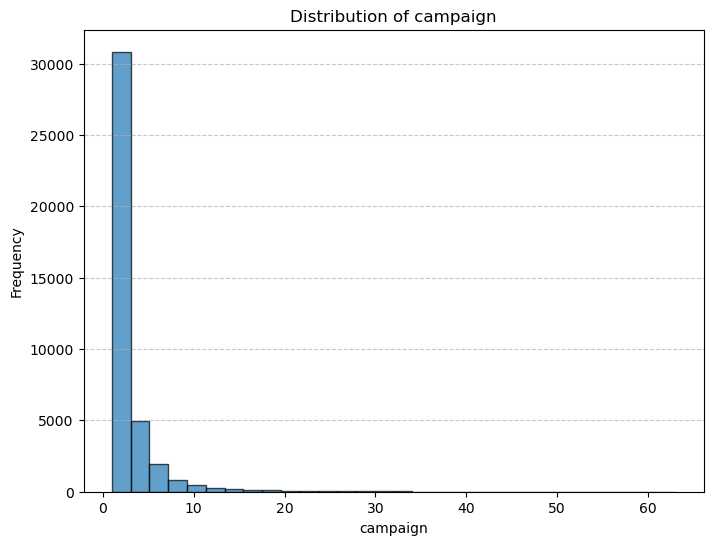

In [22]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign']
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(data[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

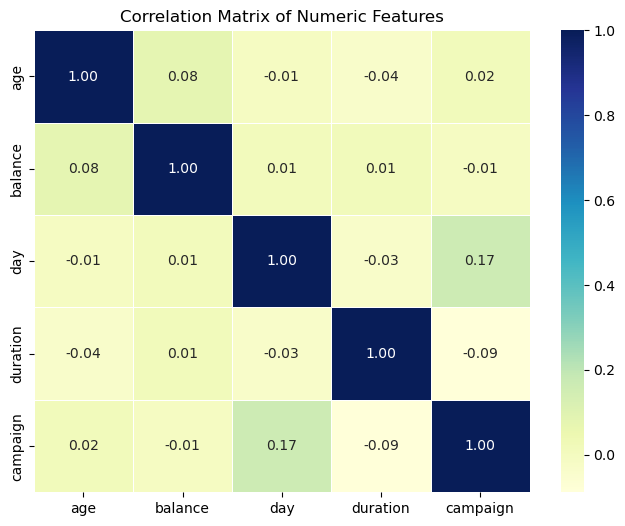

In [23]:
# Analyze correlations between numeric features
correlation_matrix = data[['age', 'balance', 'day', 'duration', 'campaign']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()



Mean age by y:
 y
0    40.599208
1    39.844959
Name: age, dtype: float64

Mean balance by y:
 y
0    1249.752533
1    1588.495856
Name: balance, dtype: float64

Mean duration by y:
 y
0    221.408042
1    682.958564
Name: duration, dtype: float64

Mean campaign by y:
 y
0    2.918688
1    2.414365
Name: campaign, dtype: float64

Distribution of y by job:
 y                 0    1
job                     
admin          4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17


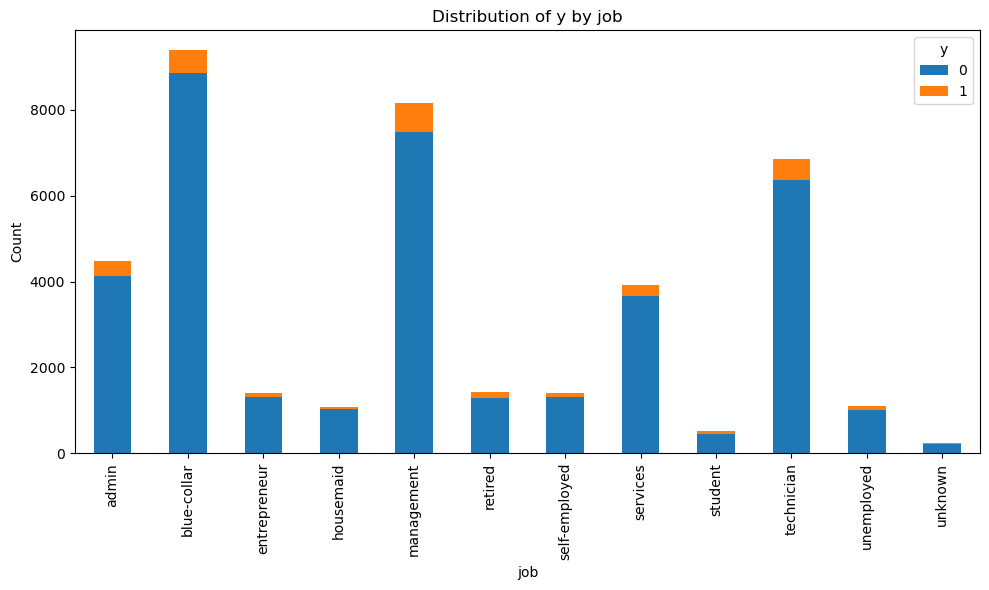


Distribution of y by marital:
 y             0     1
marital              
divorced   4334   391
married   22908  1478
single     9862  1027


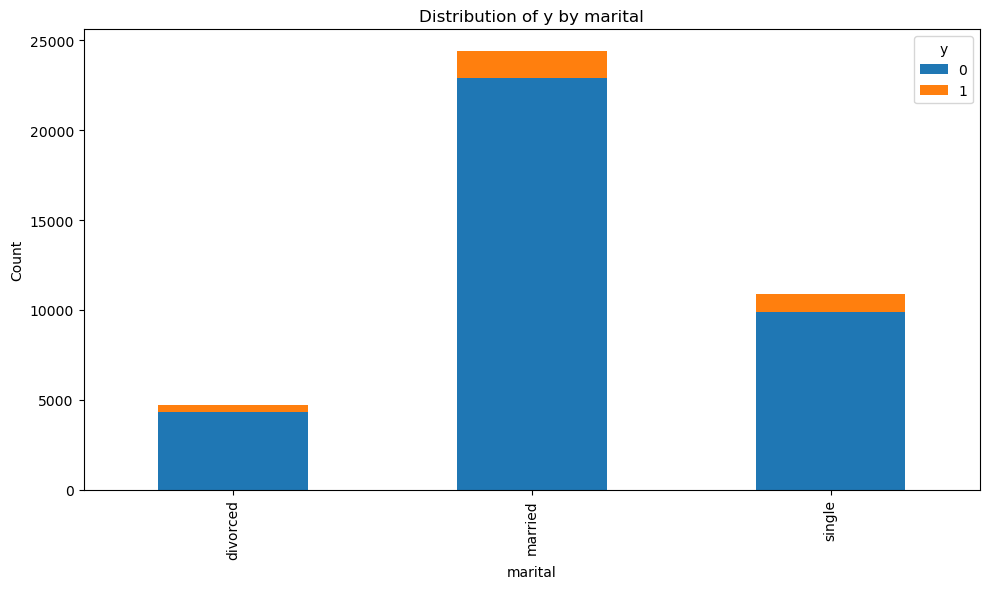


Distribution of y by education:
 y              0     1
education             
primary     5917   353
secondary  19575  1418
tertiary   10177  1029
unknown     1435    96


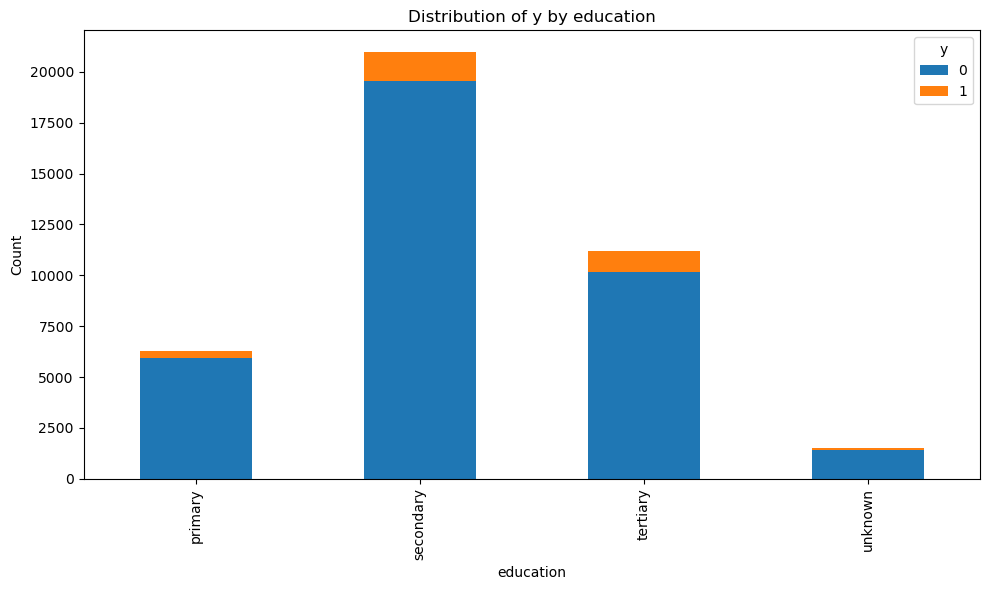


Distribution of y by default:
 y            0     1
default             
0        36344  2847
1          760    49


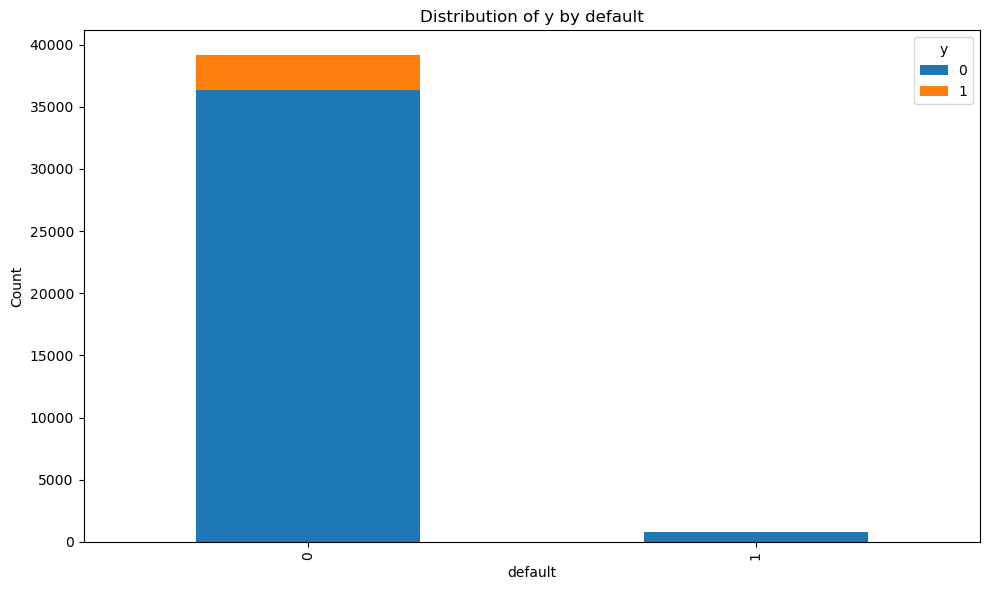


Distribution of y by housing:
 y            0     1
housing             
0        14537  1432
1        22567  1464


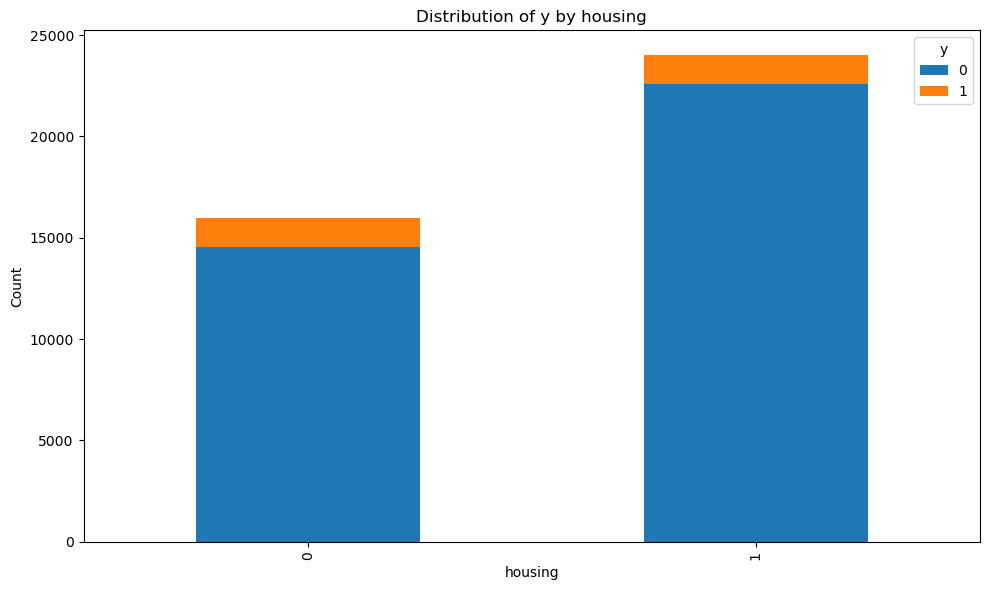


Distribution of y by loan:
 y         0     1
loan             
0     30554  2516
1      6550   380


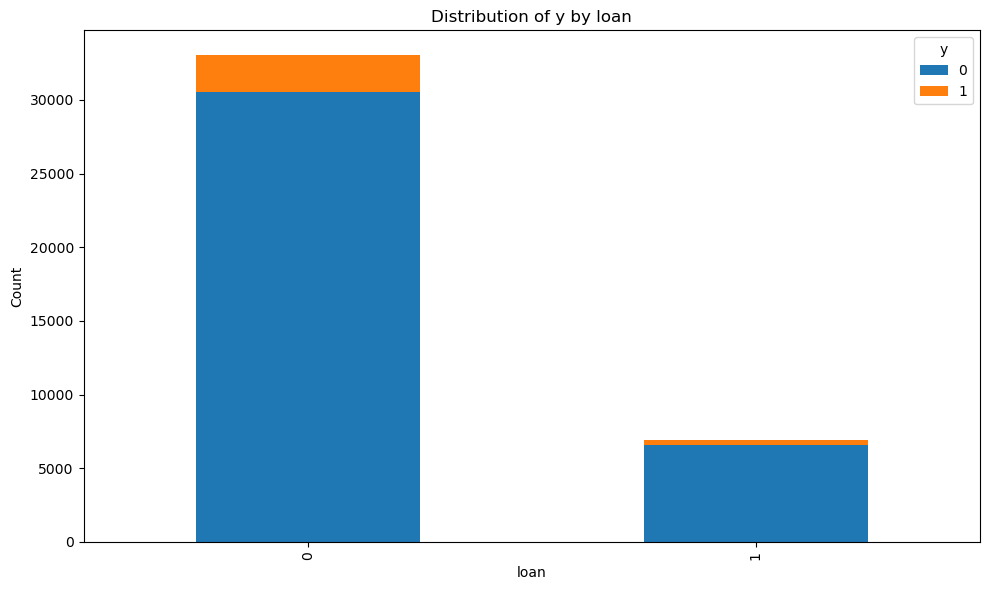


Distribution of y by contact:
 y              0     1
contact               
cellular   22681  2233
telephone   2155   166
unknown    12268   497


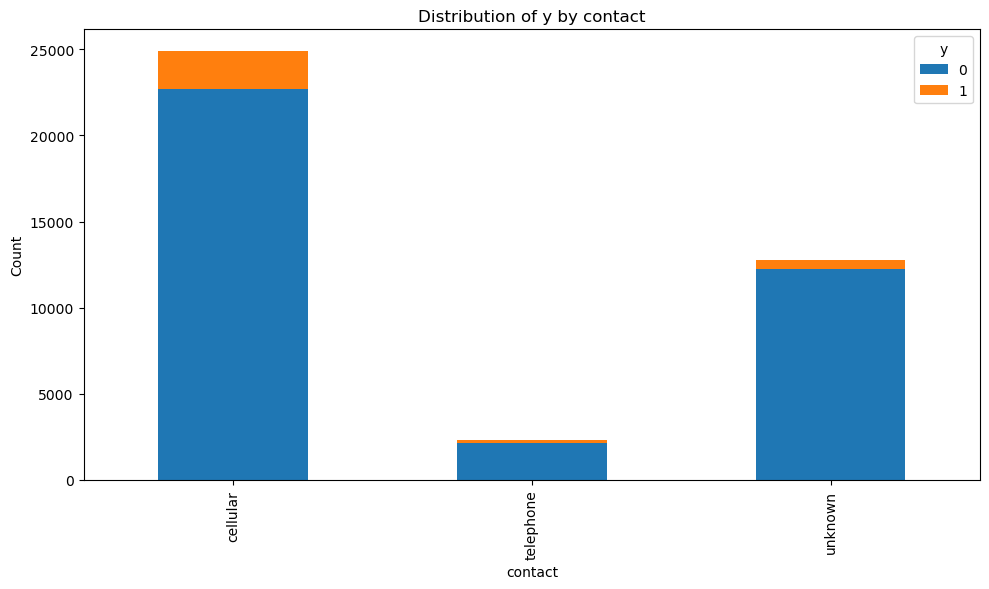


Distribution of y by month:
 y          0    1
month            
apr     2267  451
aug     4927  288
dec       12    1
feb     2041  255
jan     1138   38
jul     5996  384
jun     4440  294
mar      133  125
may    12741  791
nov     3378  220
oct       31   49


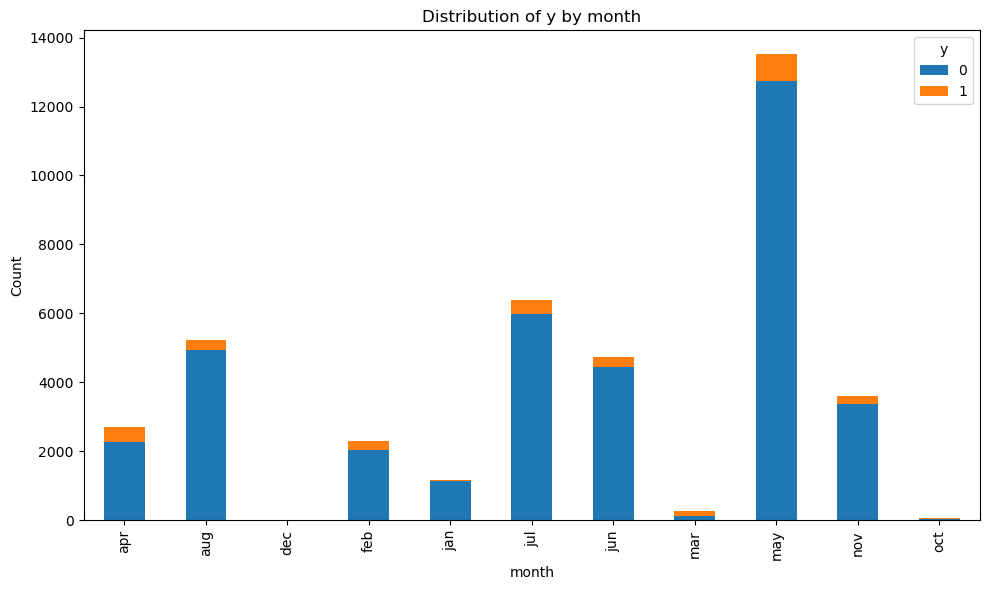

In [25]:
data['y'] = data['y'].astype(str).str.lower()

# 1. Correlation of numerical variables with y
numeric_cols = ['age', 'balance', 'duration', 'campaign']
for col in numeric_cols:
    mean_values = data.groupby('y')[col].mean()
    print(f"\nMean {col} by y:\n", mean_values)

# 2. Grouping categorical variables by y
for col in categorical_columns:
    if col != 'y':
        grouped = data.groupby([col, 'y']).size().unstack(fill_value=0)
        print(f"\nDistribution of y by {col}:\n", grouped)

        # Visualize categorical influence on y
        grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Distribution of y by {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.legend(title='y')
        plt.tight_layout()
        plt.show()

# 3. Focused trend: Age vs y
age_group = data.groupby('age')['y'].value_counts(normalize=True).unstack(fill_value=0)
if 'yes' in age_group.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(age_group.index, age_group['yes'] * 100, color='green', marker='o')
    plt.title('Percentage of y=1 by Age')
    plt.xlabel('Age')
    plt.ylabel('% of y=1')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

By above charts we can have teh following conclusions. 
The job categories of Admin, Blue-collar, and Service encompass the largest portion of the customer base.
Most customers are married.
A majority of customers possess secondary education.
The majority of customers do not have credit defaults.
The primary mode of contact with customers is via cellular phones.
The majority of customers were contacted in May.

This charts just give us the information and more detailed analysis is required for further conclusions. 

T-test for Balance: t-statistic=nan, p-value=nan

Distribution of y by job:
 y                 0    1
job                     
admin          4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17


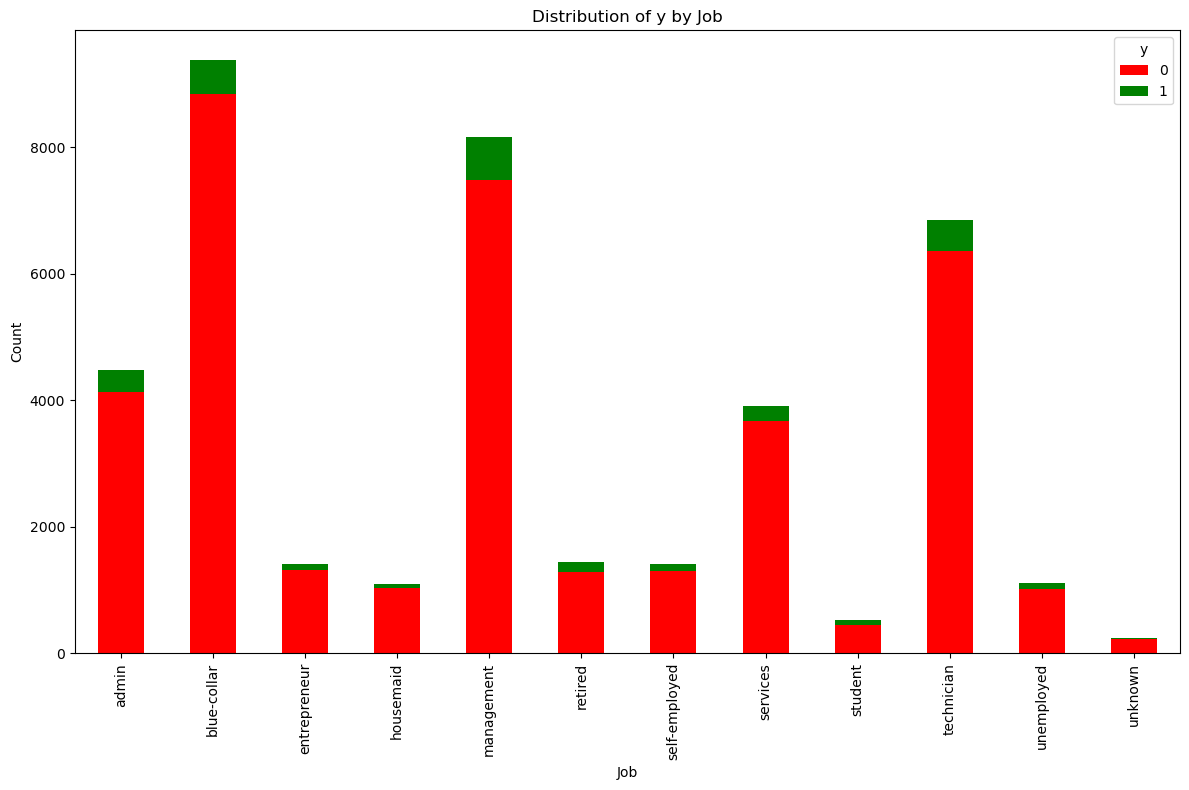

Chi-square Test for Job: chi2=149.75, p-value=0.0000

Distribution of y by marital status:
 y             0     1
marital              
divorced   4334   391
married   22908  1478
single     9862  1027


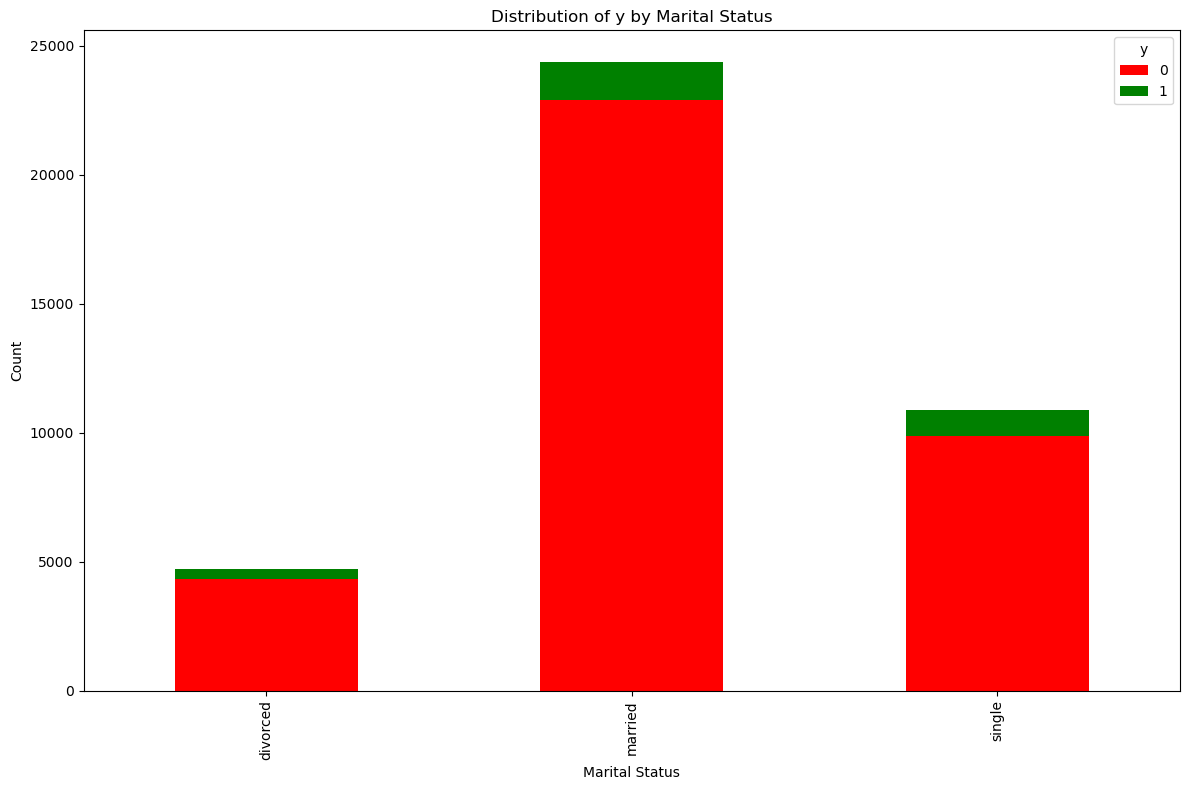

Chi-square Test for Marital Status: chi2=135.90, p-value=0.0000


In [29]:
# 2. Analyze the impact of balance on y
balance_yes = data[data['y'] == 'yes']['balance']
balance_no = data[data['y'] == 'no']['balance']


# Perform t-test for balance
stat, p_value = ttest_ind(balance_yes, balance_no, equal_var=False)
print(f"T-test for Balance: t-statistic={stat:.2f}, p-value={p_value:.4f}")

# 3. Analyze the impact of job on y
job_group = data.groupby(['job', 'y']).size().unstack(fill_value=0)
print("\nDistribution of y by job:\n", job_group)

# Visualize job distribution
job_group.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
plt.title('Distribution of y by Job')
plt.xlabel('Job')
plt.ylabel('Count')
plt.legend(title='y')
plt.tight_layout()
plt.show()

# Perform Chi-square test for job and y
chi2, p, dof, expected = chi2_contingency(job_group)
print(f"Chi-square Test for Job: chi2={chi2:.2f}, p-value={p:.4f}")

# 4. Analyze marital status and its impact on y
marital_group = data.groupby(['marital', 'y']).size().unstack(fill_value=0)
print("\nDistribution of y by marital status:\n", marital_group)

# Visualize marital status distribution
marital_group.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
plt.title('Distribution of y by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='y')
plt.tight_layout()
plt.show()

# Perform Chi-square test for marital status and y
chi2, p, dof, expected = chi2_contingency(marital_group)
print(f"Chi-square Test for Marital Status: chi2={chi2:.2f}, p-value={p:.4f}")

Chi Square Statistic Test indicates a substantial deviation between the observed and expected data.
P values suggests the results are highly significant, as the p-value is much lower than the typical threshold of 0.05.

The red bar is for no's and the green bar depicts how many people in that category have subscribed for the term deposit. 

Outlier detection 

In [30]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
# Function to identify outliers and create a boolean mask
def identify_outliers_iqr(data, columns):
    outlier_mask = pd.DataFrame(False, index=data.index, columns=columns)
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_mask[column] = (data[column] < lower_bound) | (data[column] > upper_bound)
    return outlier_mask

# Identifying outliers
outlier_mask = identify_outliers_iqr(data, numerical_columns)

# Adding an "outlier" column to flag rows with any outliers
data['outlier'] = outlier_mask.any(axis=1)


In [31]:
# Removing rows with outliers
data_cleaned = data[~data['outlier']].drop(columns=['outlier'])

# Display the shape of the data before and after removing outliers
print("Original data shape:", data.shape)
print("Data shape after removing outliers:", data_cleaned.shape)


Original data shape: (40000, 15)
Data shape after removing outliers: (24497, 14)


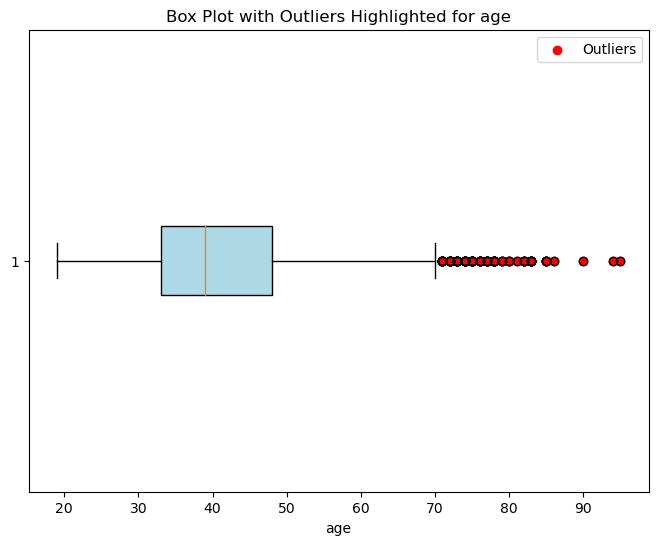

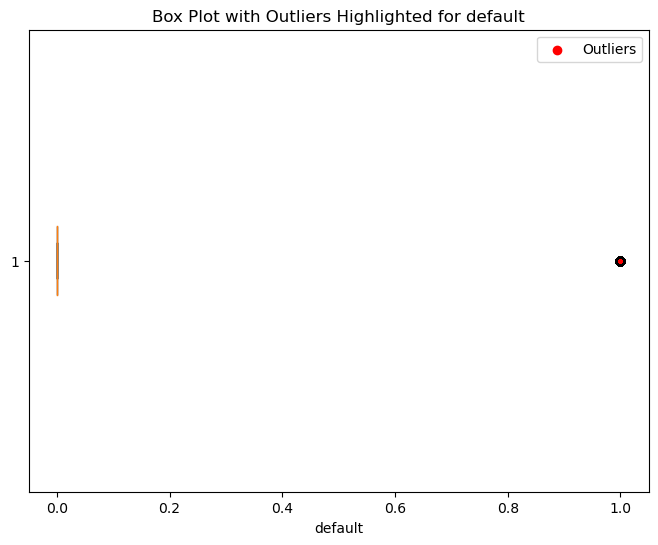

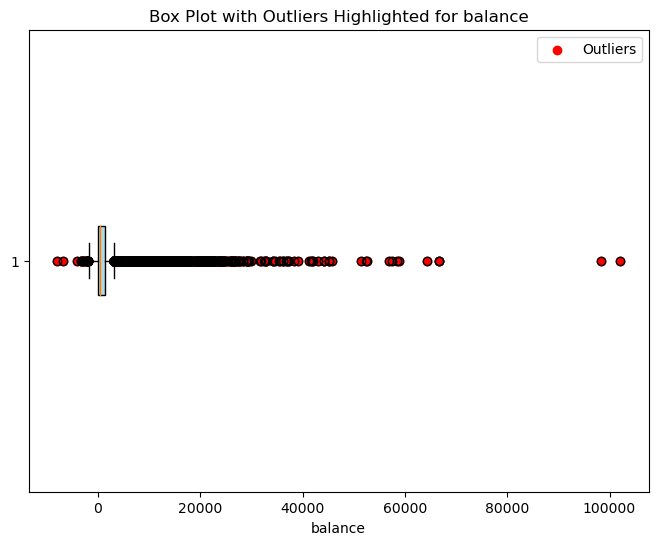

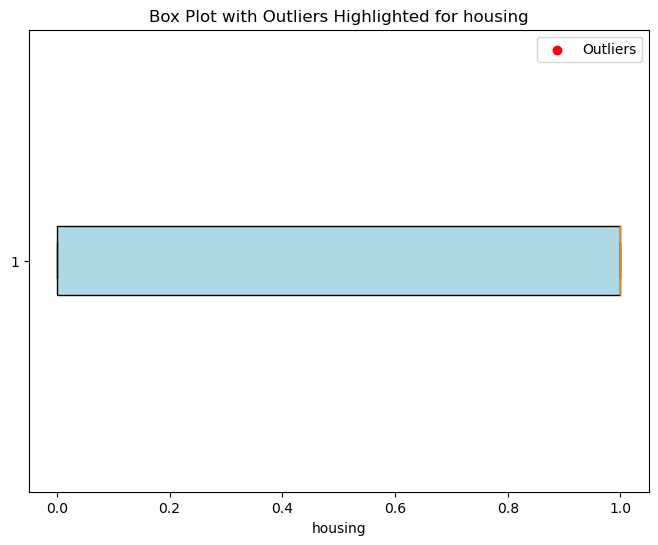

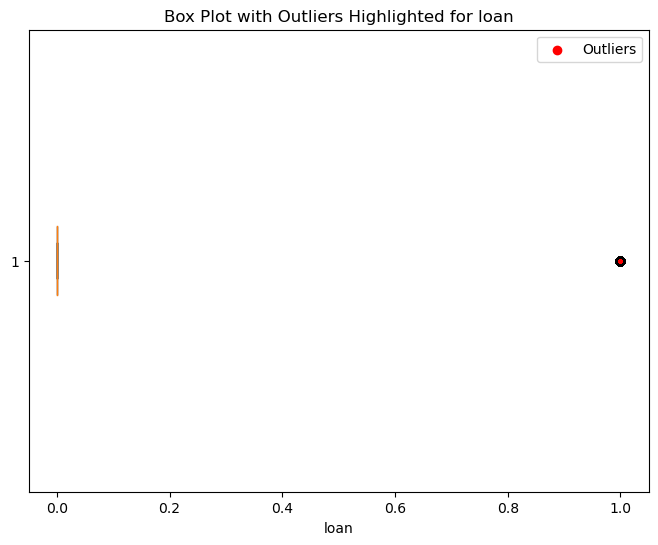

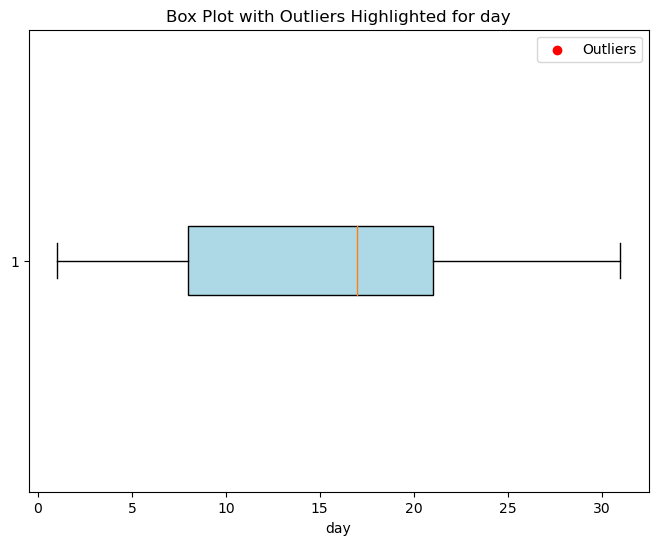

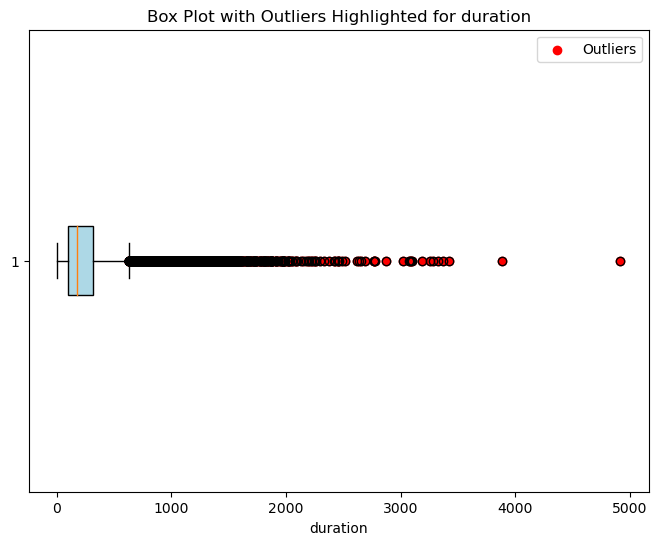

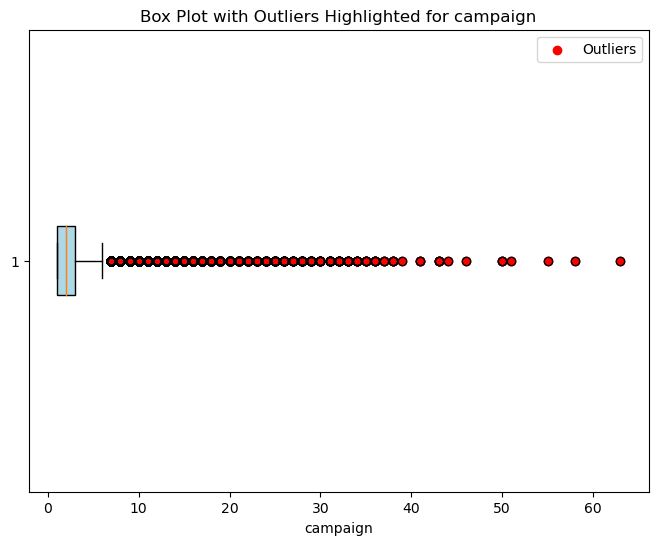

In [32]:
def plot_boxplot_outliers(df, outlier_mask, column):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue"))
    outliers = df.loc[outlier_mask[column], column]
    ax.scatter(outliers, [1] * len(outliers), color='red', label='Outliers')
    ax.set_title(f'Box Plot with Outliers Highlighted for {column}')
    ax.set_xlabel(column)
    ax.legend()
    plt.show()

# Plot box plots for all numerical columns
for column in numerical_columns:
    plot_boxplot_outliers(data, outlier_mask, column)


Analyzing job:
y                 0    1
job                     
admin          4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17


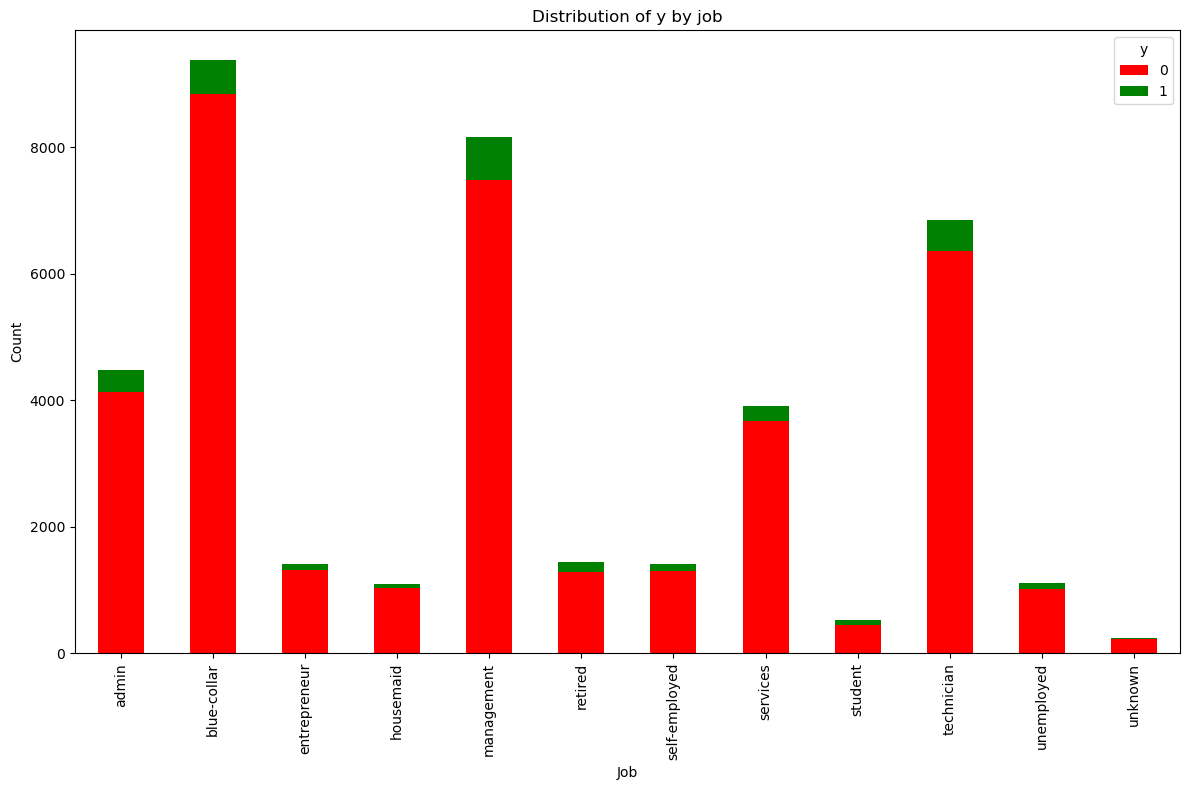

Chi-square Test for job: chi2=149.75, p-value=0.0000


Analyzing marital:
y             0     1
marital              
divorced   4334   391
married   22908  1478
single     9862  1027


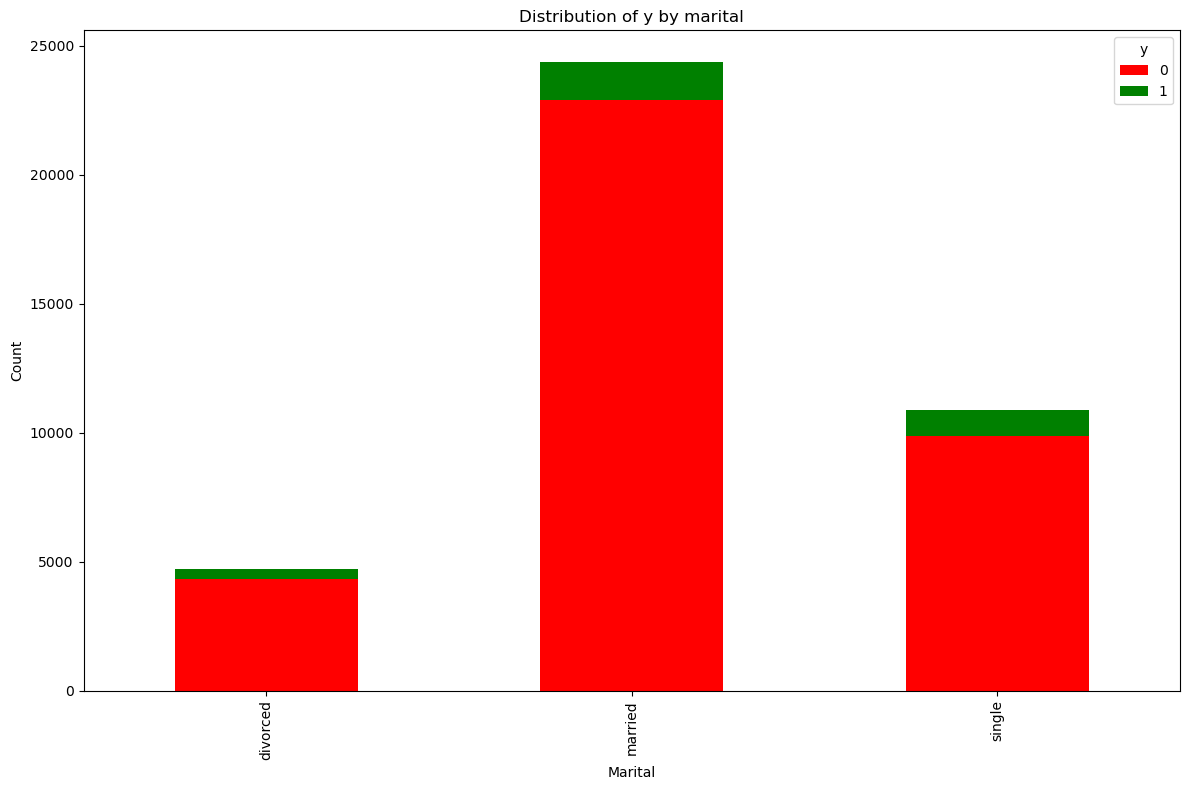

Chi-square Test for marital: chi2=135.90, p-value=0.0000


Analyzing education:
y              0     1
education             
primary     5917   353
secondary  19575  1418
tertiary   10177  1029
unknown     1435    96


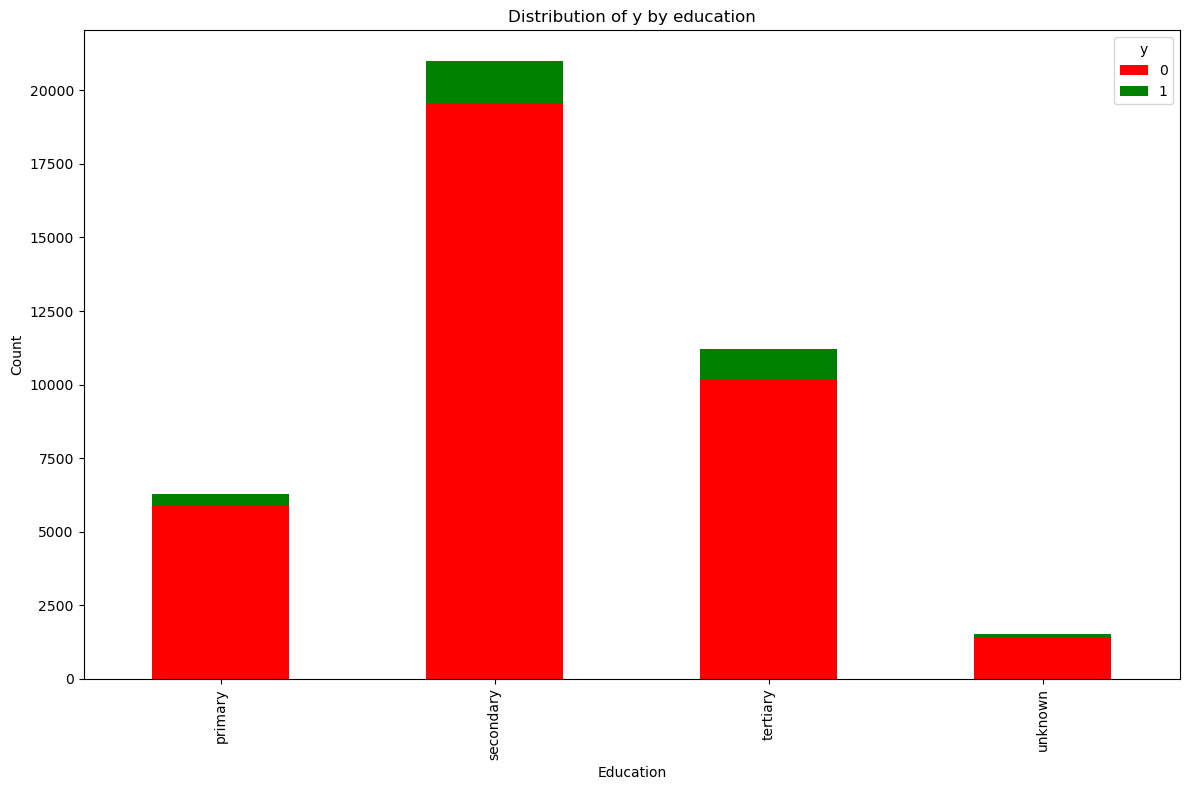

Chi-square Test for education: chi2=96.67, p-value=0.0000


Analyzing default:
y            0     1
default             
0        36344  2847
1          760    49


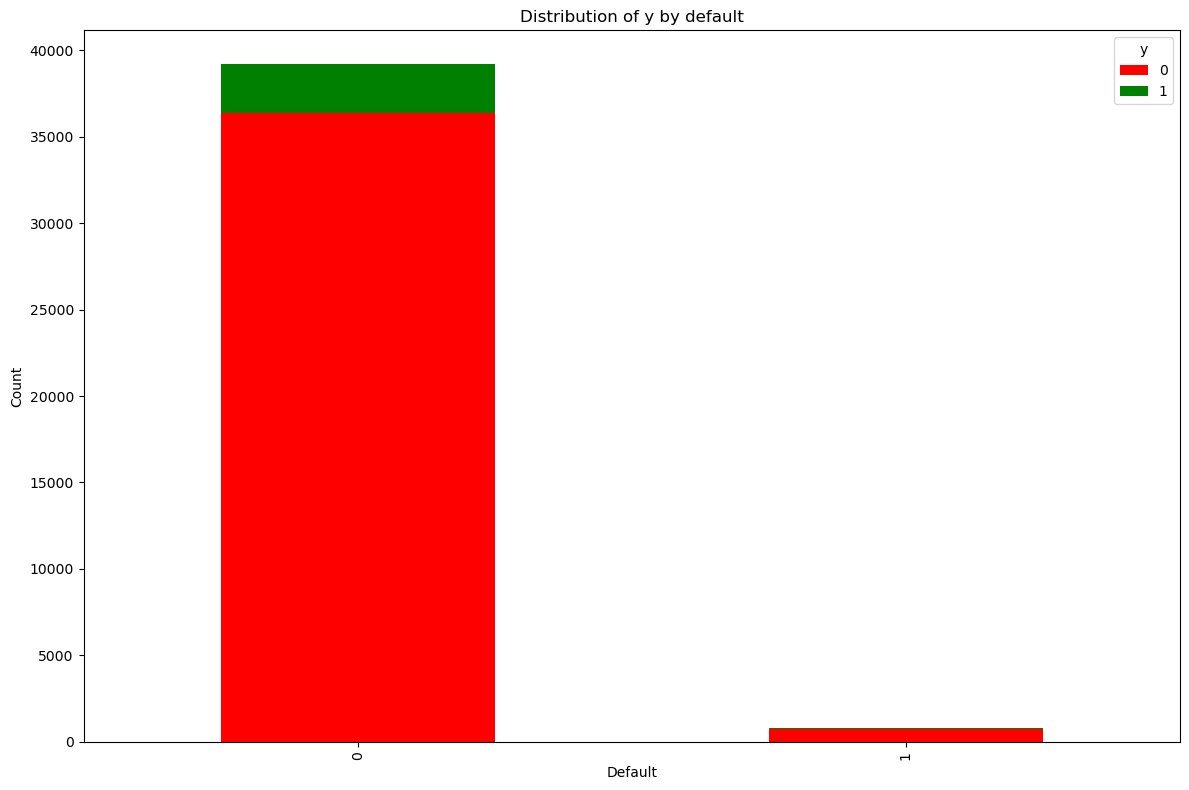

Chi-square Test for default: chi2=1.55, p-value=0.2137


Analyzing housing:
y            0     1
housing             
0        14537  1432
1        22567  1464


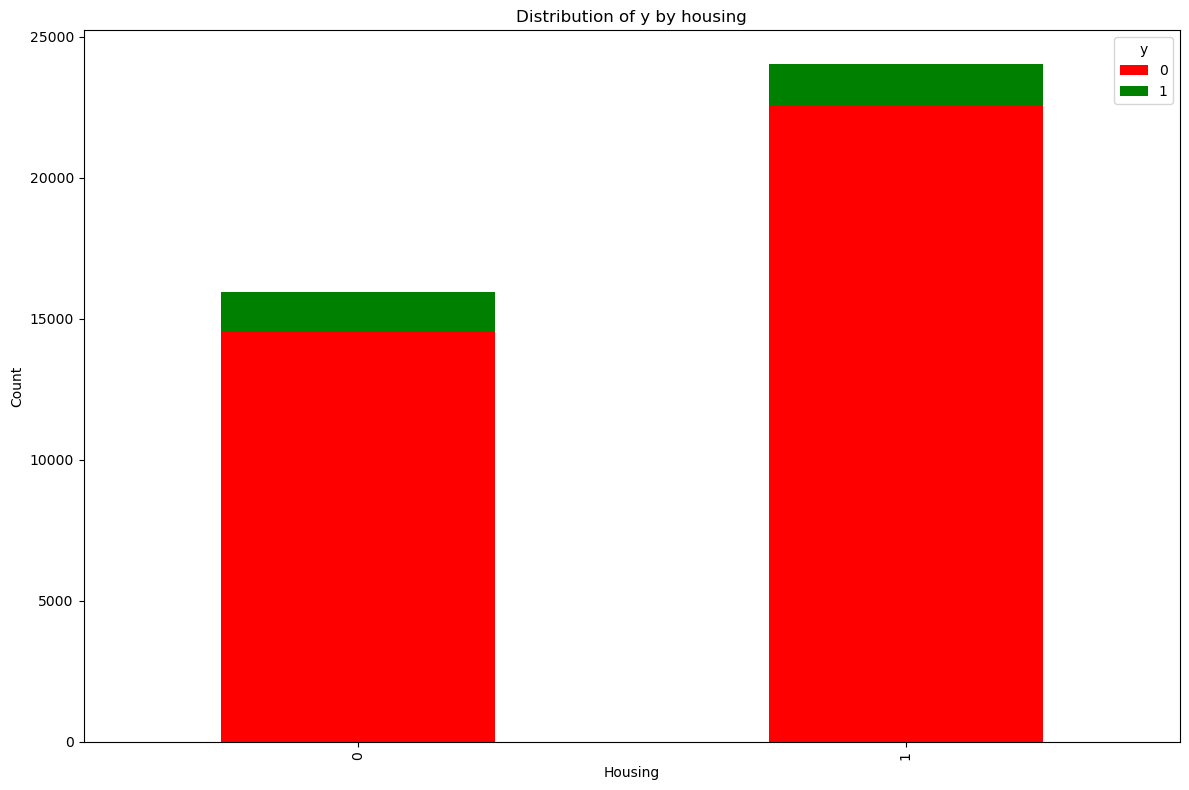

Chi-square Test for housing: chi2=117.67, p-value=0.0000


Analyzing loan:
y         0     1
loan             
0     30554  2516
1      6550   380


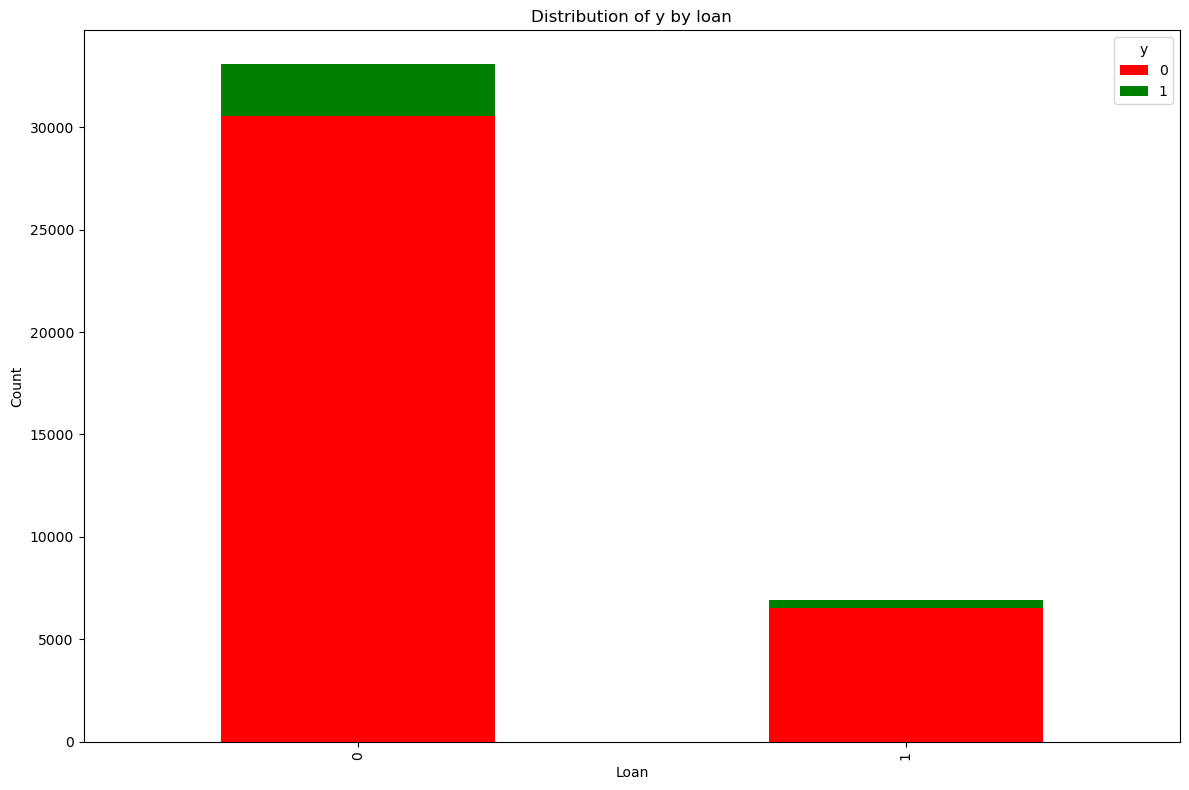

Chi-square Test for loan: chi2=38.20, p-value=0.0000


Analyzing contact:
y              0     1
contact               
cellular   22681  2233
telephone   2155   166
unknown    12268   497


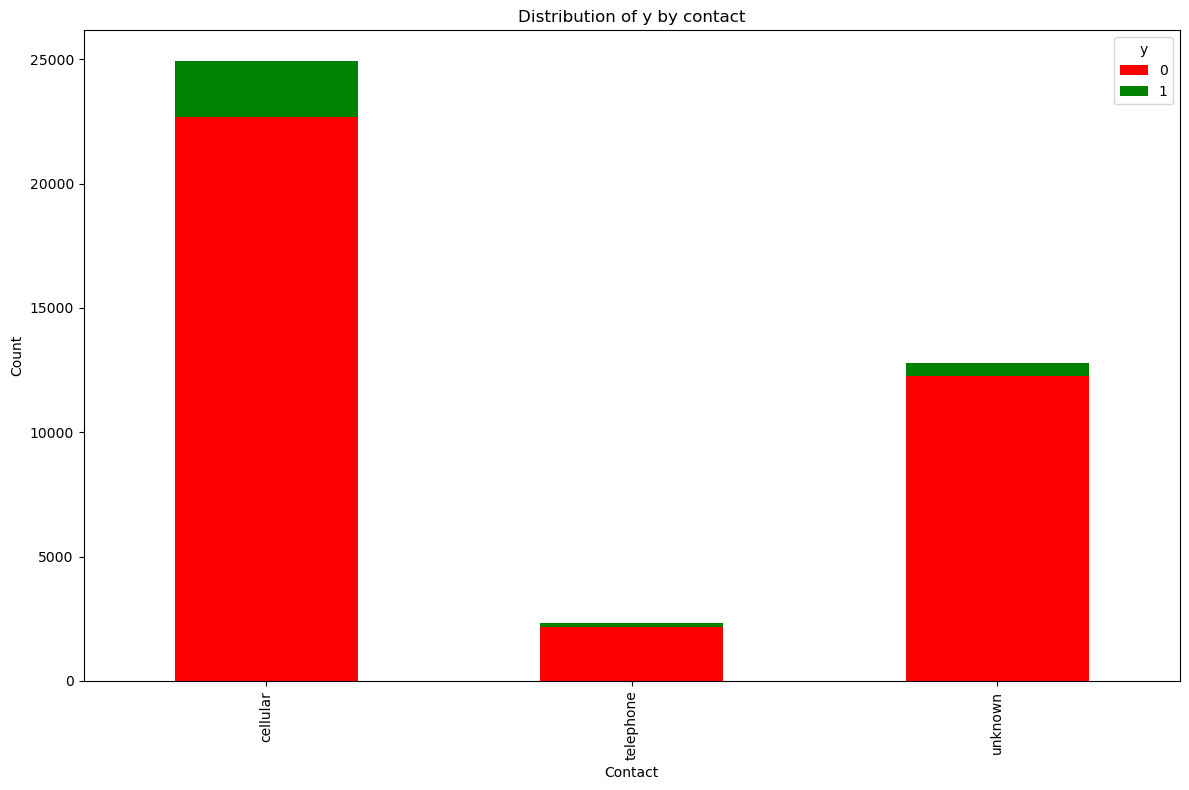

Chi-square Test for contact: chi2=323.01, p-value=0.0000


Analyzing month:
y          0    1
month            
apr     2267  451
aug     4927  288
dec       12    1
feb     2041  255
jan     1138   38
jul     5996  384
jun     4440  294
mar      133  125
may    12741  791
nov     3378  220
oct       31   49


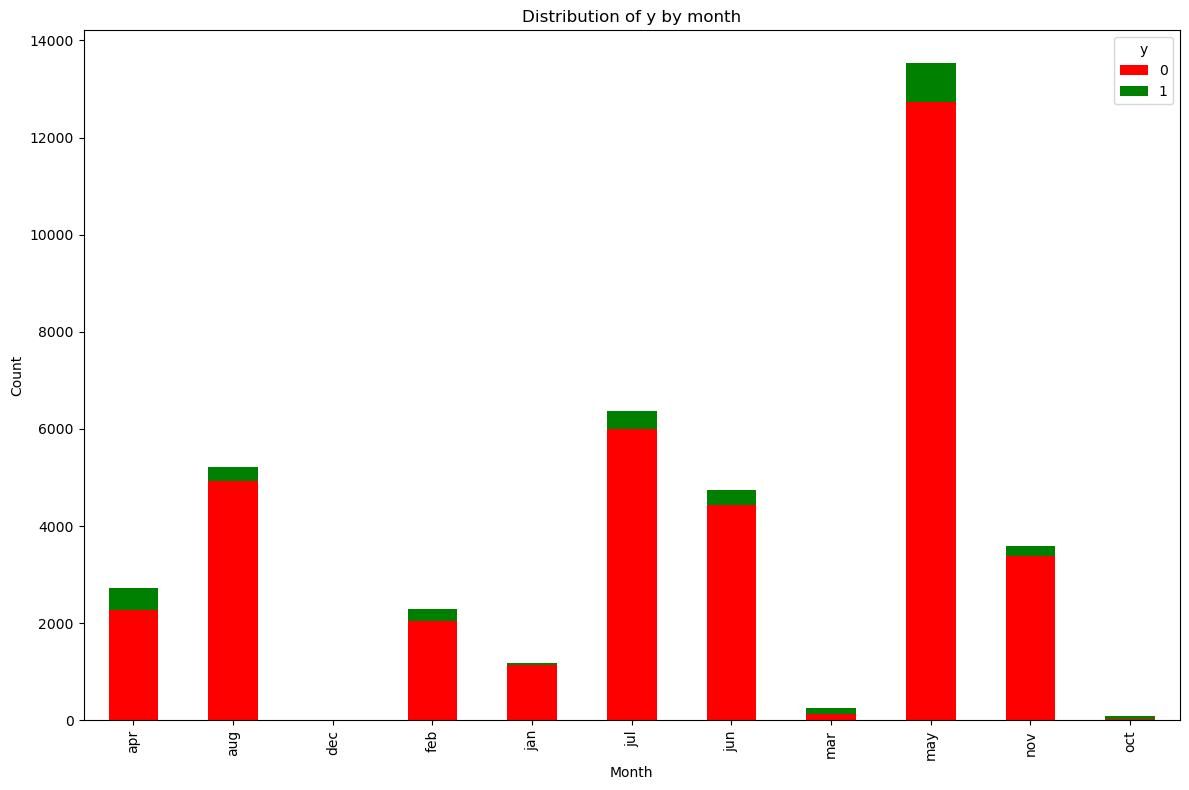

Chi-square Test for month: chi2=1523.71, p-value=0.0000


Updated categories for job:
blue-collar    9383
management     8166
other          7206
technician     6852
admin          4483
services       3910
Name: job, dtype: int64

Updated categories for marital:
married     24386
single      10889
divorced     4725
Name: marital, dtype: int64

Updated categories for education:
secondary    20993
tertiary     11206
primary       6270
other         1531
Name: education, dtype: int64

Updated categories for default:
0        39191
other      809
Name: default, dtype: int64

Updated categories for housing:
1    24031
0    15969
Name: housing, dtype: int64

Updated categories for loan:
0    33070
1     6930
Name: loan, dtype: int64

Updated categories for contact:
cellular     24914
unknown      12765
telephone     2321
Name: contact, dtype: int64

Updated categories for month:
may      13532
jul       6380
aug       5215
jun       4734
nov       3598
apr       2718
feb       2296
other    

In [34]:
# Understanding categorical distribution and grouping categories for modelling
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for col in categorical_columns:
    print(f"\nAnalyzing {col}:")
    grouped = data.groupby([col, 'y']).size().unstack(fill_value=0)
    print(grouped)

    # Visualize the distribution
    grouped.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'green'])
    plt.title(f'Distribution of y by {col}')
    plt.xlabel(col.capitalize())
    plt.ylabel('Count')
    plt.legend(title='y')
    plt.tight_layout()
    plt.show()

    # Perform Chi-square test
    chi2, p, dof, expected = chi2_contingency(grouped)
    print(f"Chi-square Test for {col}: chi2={chi2:.2f}, p-value={p:.4f}\n")

# Grouping categories with low counts for modeling perspective
def group_low_counts(column, threshold=0.05):
    counts = data[column].value_counts(normalize=True)
    low_categories = counts[counts < threshold].index
    data[column] = data[column].apply(lambda x: 'other' if x in low_categories else x)
    print(f"\nUpdated categories for {column}:")
    print(data[column].value_counts())

for col in categorical_columns:
    group_low_counts(col, threshold=0.05)

# 1. Analyze the impact of age on y
age_group = data.groupby('age')['y'].value_counts(normalize=True).unstack(fill_value=0)
if 'yes' in age_group.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(age_group.index, age_group['yes'] * 100, color='green', marker='o')
    plt.title('Percentage of y=1 by Age')
    plt.xlabel('Age')
    plt.ylabel('% of y=1')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Encoding the dependent variable

In [35]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder

ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include="category")), remainder="passthrough")
features = ct.fit_transform(features)

In [36]:
features = pd.DataFrame(features)
print(features.head())
features.shape

    0    1    2    3    4    5    6    7    8    9   ...   31   32    33   34  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  58.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  44.0  0.0   
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   
3  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  47.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  33.0  0.0   

       35   36   37   38     39   40  
0  2143.0  1.0  0.0  5.0  261.0  1.0  
1    29.0  1.0  0.0  5.0  151.0  1.0  
2     2.0  1.0  1.0  5.0   76.0  1.0  
3  1506.0  1.0  0.0  5.0   92.0  1.0  
4     1.0  0.0  0.0  5.0  198.0  1.0  

[5 rows x 41 columns]


(40000, 41)

In [37]:
X_train, X_test,  y_train, y_test = train_test_split(features, y.values, test_size = 0.2, random_state = 1)

In [38]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(32000, 41) (8000, 41) (32000,) (8000,)


In [39]:
X_train= pd.DataFrame(X_train)
print(X_train.head())
X_train.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


(32000, 41)

In [55]:
X_test = pd.DataFrame(X_test)
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0   
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

Random Forest

In [56]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, classification_report, roc_auc_score, roc_curve
rfc = RandomForestClassifier(n_estimators=1000)

rfc.fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, rfc_pred)*100))

Accuracy score: 93.77 %


In [57]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7435
           1       0.62      0.31      0.41       565

    accuracy                           0.94      8000
   macro avg       0.78      0.65      0.69      8000
weighted avg       0.93      0.94      0.93      8000



In [58]:
pd.DataFrame(confusion_matrix(y_test,rfc_pred))

,0,1
0,7327,108
1,390,175


Sampling the data

In [59]:
y_0 = y_train==0
y_1 = y_train==1

# upsample minority
y_upsampled = resample(y_1,
                          replace=True, # sample with replacement
                          n_samples=int(len(y_0)/3), # match number in majority class
                          random_state=1) # reproducible results

# combine majority and upsampled minority
upsampled = np.concatenate([y_0, y_upsampled])

# convert to DataFrame
upsampled= pd.DataFrame(upsampled)

# check new class counts
upsampled.value_counts()

True     30425
False    12241
dtype: int64

In [60]:
print(X_train.head())

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
21721  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
15576  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  41.0   
28716  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  27.0   
204    0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  35.0   
36677  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  46.0   

        34     35   36   37    38     39   40  
21721  0.0  268.0  0.0  0.0  19.0  255.0  1.0  
15576  0.0   98.0  0.0  1.0  21.0   97.0  6.0  
28716  0.0  116.0  0.0  0.0  30.0   46.0  1.0  
204    0.0    0.0  1.0  0.0   5.0  471.0  1.0  
36677  0.0  147.0  1.0  0.0  12.0  189.0  1.0  

[5 rows x 41 columns]


In [61]:
print(X_test.head())
X_test.shape

        0    1    2    3    4    5    6    7    8    9   ...   31   32    33  \
3841   0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  57.0   
12898  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  49.0   
15032  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  37.0   
36781  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  33.0   
9201   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  40.0   

        34      35   36   37    38     39   40  
3841   0.0   260.0  1.0  0.0  16.0   38.0  3.0  
12898  1.0  -354.0  0.0  1.0   7.0  455.0  1.0  
15032  1.0     0.0  1.0  0.0  17.0  158.0  1.0  
36781  0.0   177.0  1.0  1.0  12.0   22.0  8.0  
9201   0.0  1779.0  1.0  0.0   5.0   59.0  7.0  

[5 rows x 41 columns]


(8000, 41)

Random Forest Upsampling 

In [62]:
class_weights = {0: 1, 1: 3}
upsampled_rfc = RandomForestClassifier(n_estimators=30, class_weight = class_weights, criterion='entropy', max_depth=14, min_samples_split=8, random_state=0)
upsampled_rfc.fit(X_train, y_train)

upsampled_pred_rfc = upsampled_rfc.predict(X_test)

In [63]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, upsampled_pred_rfc)*100))

Accuracy score: 93.69 %


In [64]:
print(classification_report(y_test, upsampled_pred_rfc))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      7435
           1       0.55      0.55      0.55       565

    accuracy                           0.94      8000
   macro avg       0.76      0.76      0.76      8000
weighted avg       0.94      0.94      0.94      8000



In [65]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, upsampled_pred_rfc)*100))

F1 score: 55.19 %


In [66]:
print(pd.DataFrame(confusion_matrix(y_test,upsampled_pred_rfc)))

      0    1
0  7184  251
1   254  311


In [67]:
print('Recall score: {:.2f} %'.format(recall_score(y_test, upsampled_pred_rfc)*100))

Recall score: 55.04 %


In [68]:
upsampled_pred_proba_rfc = upsampled_rfc.predict_proba(X_test)
rfc_probs = upsampled_pred_proba_rfc[:, 1]

In [69]:
rfc_auc = roc_auc_score(y_test, rfc_probs)
print(rfc_auc)

0.950101826448691


In [70]:
# Define a range of threshold values to experiment with
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_rf_th = (rfc_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_rf_th)
    f1 = f1_score(y_test, y_pred_rf_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8124 F1-score: 0.4216
Threshold: 0.2 Accuracy: 0.8825 F1-score: 0.5214
Threshold: 0.3 Accuracy: 0.9099 F1-score: 0.5612
Threshold: 0.4 Accuracy: 0.9273 F1-score: 0.5721
Threshold: 0.5 Accuracy: 0.9369 F1-score: 0.5519
Threshold: 0.6 Accuracy: 0.9379 F1-score: 0.4371
Threshold: 0.7 Accuracy: 0.9340 F1-score: 0.2072
Threshold: 0.8 Accuracy: 0.9300 F1-score: 0.0210
Threshold: 0.9 Accuracy: 0.9294 F1-score: 0.0000


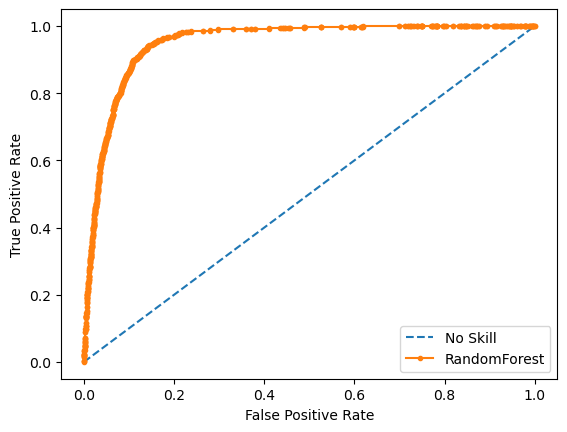

In [71]:
fpr, tpr, thresholds = roc_curve(y_test, rfc_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='RandomForest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [72]:
# Ensure tpr and fpr are numpy arrays
tpr = np.array(tpr)  # Replace 'tpr' with your actual array
fpr = np.array(fpr)  # Replace 'fpr' with your actual array

# Calculate the G-mean for each threshold
gmeans = np.sqrt(tpr * (1 - fpr))

# Locate the index of the largest G-mean
ix = np.argmax(gmeans)
print(f"Best G-mean: {gmeans[ix]:.4f}, at threshold index: {ix}")



Best G-mean: 0.8989, at threshold index: 606


RandomForest Upsampling Cross Validation Using GridSearch 

In [73]:
# class_weights = 
params = {'n_estimators': [10, 20, 25, 50, 100],'class_weight' : ['balanced',{0: 1, 1: 3}], 
          'max_depth': [4,5,6,7,8,9,10,12,14,20,50], 'criterion':['entropy','gini'], 'min_samples_split':[2,4,6,8,10,12]}
grid_search_rd = GridSearchCV(estimator= upsampled_rfc, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_rd.fit(X_train, y_train)
best_accuracy_rd = grid_search_rd.best_score_
best_params_rd = grid_search_rd.best_params_
print("Best f1_Score for RandomForest: {:.2f}%".format(best_accuracy_rd*100))
print("Best params for RandomForest: ",best_params_rd)

Best f1_Score for RandomForest: 56.74%
Best params for RandomForest:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 12, 'n_estimators': 100}


In [74]:
accuracies_Urfc = cross_val_score(estimator = upsampled_rfc, X = X_train, y = y_train, cv = 5)
print("Upsampled Random Forest Accuracy: {:.2f} %".format(accuracies_Urfc.mean()*100))
print("Upsampled Random Forest Standard Deviation: {:.2f} %".format(accuracies_Urfc.std()*100))

Upsampled Random Forest Accuracy: 93.29 %
Upsampled Random Forest Standard Deviation: 0.21 %


In [90]:
from sklearn.metrics import accuracy_score

# Fit the XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Predict using the trained model
y_pred_xgb = xgb.predict(X_test)

# Calculate and print the accuracy score
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_xgb) * 100))


Accuracy score: 93.89 %


In [77]:
print('F1 score: {:.2f} %'.format(f1_score(y_test, y_pred_xgb)*100))

F1 score: 49.12 %


In [78]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7435
           1       0.60      0.42      0.49       565

    accuracy                           0.94      8000
   macro avg       0.78      0.70      0.73      8000
weighted avg       0.93      0.94      0.93      8000



In [79]:
print(confusion_matrix(y_test, y_pred_xgb))

[[7275  160]
 [ 329  236]]


In [80]:
y_pred_proba_xgb = xgb.predict_proba(X_test)

In [81]:
print(pd.DataFrame(y_pred_proba_xgb))

             0         1
0     0.999869  0.000131
1     0.842709  0.157291
2     0.999273  0.000727
3     0.999993  0.000007
4     0.999982  0.000018
...        ...       ...
7995  0.936451  0.063549
7996  0.998379  0.001621
7997  0.998529  0.001471
7998  0.999766  0.000235
7999  0.976431  0.023569

[8000 rows x 2 columns]


XGBoost Upsampling

In [82]:
class_weights = np.array([1, 3])
xg = XGBClassifier(scale_pos_weight=class_weights[1], random_state=42)  
## Here class_weight[1] means 3 which is giving thrice the weight to class '1'.
xg.fit(X_train,y_train)

y_pred_xg = xg.predict(X_test)

In [83]:
print('Accuracy score: {:.2f} %'.format(accuracy_score(y_test, y_pred_xg)*100))

Accuracy score: 93.26 %


In [84]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      7435
           1       0.52      0.61      0.56       565

    accuracy                           0.93      8000
   macro avg       0.74      0.78      0.76      8000
weighted avg       0.94      0.93      0.94      8000



In [85]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred_xg)))

      0    1
0  7115  320
1   219  346


In [86]:
upsampled_pred_proba_xg = xg.predict_proba(X_test)
xg_probs = upsampled_pred_proba_xg[:, 1]

In [87]:
xg_auc = roc_auc_score(y_test,xg_probs)
print(xg_auc)

0.9473647124637716


In [88]:
thresholds = np.arange(0.1, 1.0, 0.1)

# Play with different threshold values
for threshold in thresholds:
    # Convert probabilities to binary predictions based on the threshold
    y_pred_xg_th = (xg_probs >= threshold).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred_xg_th)
    f1 = f1_score(y_test, y_pred_xg_th)

    # Print the evaluation metrics for each threshold
    print(f"Threshold: {threshold:.1f}",f"Accuracy: {accuracy:.4f}",f"F1-score: {f1:.4f}")

Threshold: 0.1 Accuracy: 0.8694 F1-score: 0.4978
Threshold: 0.2 Accuracy: 0.9006 F1-score: 0.5470
Threshold: 0.3 Accuracy: 0.9179 F1-score: 0.5737
Threshold: 0.4 Accuracy: 0.9249 F1-score: 0.5692
Threshold: 0.5 Accuracy: 0.9326 F1-score: 0.5621
Threshold: 0.6 Accuracy: 0.9343 F1-score: 0.5227
Threshold: 0.7 Accuracy: 0.9375 F1-score: 0.4759
Threshold: 0.8 Accuracy: 0.9369 F1-score: 0.3879
Threshold: 0.9 Accuracy: 0.9327 F1-score: 0.1873


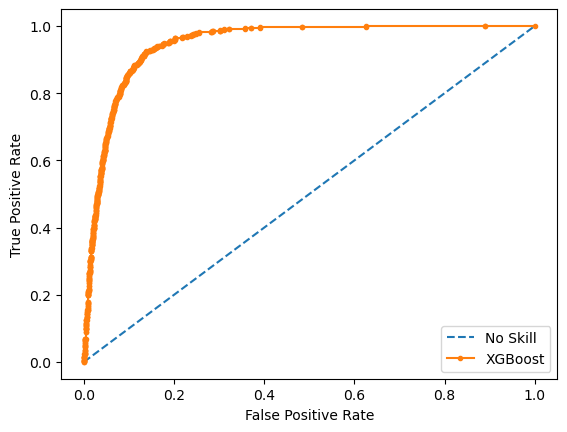

In [89]:
fpr, tpr, thresholds = roc_curve(y_test, xg_probs)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

XGBoost Upsampling Cross Validation. 

In [91]:
class_weights = np.array([1, 3])
params = {'objective': ['binary:logitraw', 'binary:logistic','reg:logistic'],'eval_metric': ['rmse','logloss'], 'max_depth': [5,10,20], 
          'scale_pos_weight':['balanced',class_weights[1]]}
grid_search_xg = GridSearchCV(estimator= xg, param_grid=params, cv= 5 , scoring='f1', n_jobs = -1)
grid_search_xg.fit(X_train, y_train)
best_accuracy_xg = grid_search_xg.best_score_
best_params_xg = grid_search_xg.best_params_
print("Best f1_score for XGBoost: {:.2f}%".format(best_accuracy_xg*100))
print("Best params for XGBoost: ",best_params_xg)

/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/pragatpagariya/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1531, in fit
    s

Best f1_score for XGBoost: 57.06%
Best params for XGBoost:  {'eval_metric': 'rmse', 'max_depth': 5, 'objective': 'binary:logistic', 'scale_pos_weight': 3}


In [92]:
accuracies_xg = cross_val_score(estimator = xg, X = X_train, y = y_train, cv = 5)
print("Upsampled XGBoost Accuracy: {:.2f} %".format(accuracies_xg.mean()*100))
print("Upsampled XGBoost Standard Deviation: {:.2f} %".format(accuracies_xg.std()*100))

Upsampled XGBoost Accuracy: 92.95 %
Upsampled XGBoost Standard Deviation: 0.26 %
